<a href="https://colab.research.google.com/github/itssyoma/itp_baratov/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №7
# Тема: Основы Numpy. Построение графиков<br>
**Дисциплина:** «Информационные технологии и программирование» <br>
**Выполнил:** Студент группы ПИЖ-б-о-22-1, направление подготовки: 09.03.04 «Программная инженерия»
Баратов Семен Григорьевич <br>
**Проверил:**
Ассистент кафедры ИСТ
Березина В.А.

# 1. Цель и содержание

Цель лабораторной работы: научиться манипулировать векторноматричными данными с использованием библиотеки NumPy.<br>
Задачи лабораторной работы:<br>
– научиться создавать массивы numpy;<br>
– научиться визуализировать данные с использование matplotlib.

# 2. Выполнение индивидуального задания

**Вариант 2.**
Сделаем столбчатую диаграмму суммы поставок по категориям товаров и круговую диаграмму соотношения просроченных товаров по категориям.

Загрузим файл, соответсвующий варианту.

In [1]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract4/p4_data_02.csv

--2023-04-09 22:43:40--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract4/p4_data_02.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57850 (56K) [text/plain]
Saving to: ‘p4_data_02.csv’

p4_data_02.csv      100%[===================>]  56.49K  --.-KB/s    in 0.005s  

2023-04-09 22:43:40 (10.1 MB/s) - ‘p4_data_02.csv’ saved [57850/57850]



Подключим библиотеки numpy и matplotlib, реализуем получение информации из файла.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

F = open('p4_data_02.csv', encoding='utf-8-sig')
header = F.readline().strip().split(';')

all_clients = []

for line in F:
  data = line.strip().split(';')
  client = {}
  for i, key in enumerate(header):
    client[key] = data[i]

  client['ID'] = int(client['ID'])
  client['Price'] = float(client['Price'][1:])

  all_clients.append(client)


Реализуем первый график.

<BarContainer object of 3 artists>

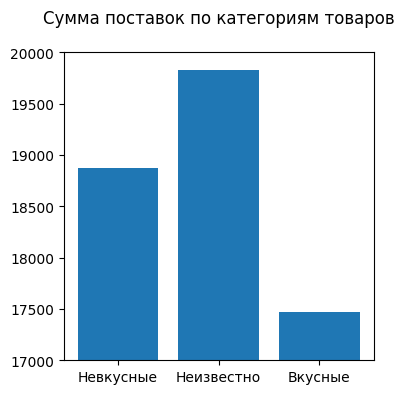

In [33]:
prices_cat = {}

for client in all_clients:
  if client['Category'] in prices_cat:
    prices_cat[client['Category']] += client['Price']
  else:
    prices_cat[client['Category']] = client['Price']

for key in prices_cat:
  prices_cat[key] = round(prices_cat[key], 2)

categories = []
sums = []
for key, value in prices_cat.items():
  categories.append(key)
  sums.append(value)

x1 = np.array(categories, 'str')
y1 = np.array(sums, 'float')

plt.figure(figsize=(4,4))
plt.ylim([17000, 20000])
plt.title('Cумма поставок по категориям товаров\n')
plt.bar(x1, y1)

Реализуем второй график

([<matplotlib.patches.Wedge at 0x7ff81d4c7220>,
 [Text(0.5520223038785278, 0.9514575009009296, 'Невкусные'),
  Text(-1.0977673533616783, -0.0700488250672071, 'Неизвестно'),
  Text(0.6114913176309664, -0.9143732107088137, 'Вкусные')],
 [Text(0.3011030748428333, 0.5189768186732343, '33.3%'),
  Text(-0.5987821927427336, -0.03820845003665841, '35.5%'),
  Text(0.33354071870779983, -0.49874902402298926, '31.2%')])

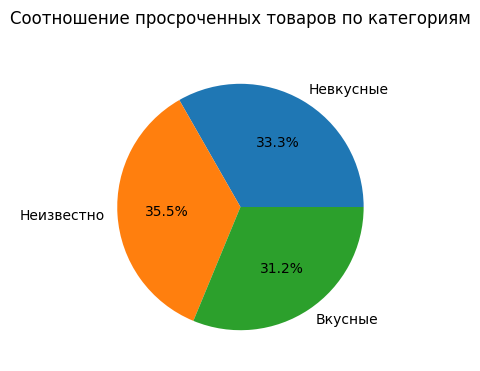

In [34]:
ofd_cat = {}

for client in all_clients:
  if client['Category'] in ofd_cat:
    if client['OutOfDate'] == "true":
      ofd_cat[client['Category']] += 1
  else:
    ofd_cat[client['Category']] = 1

categories2 = []
OFDs = []
for key, value in ofd_cat.items():
  categories2.append(key)
  OFDs.append(value)

x2 = np.array(categories2, 'str')
y2 = np.array(OFDs, 'float')

plt.figure(figsize=(4,4))
plt.title('Cоотношение просроченных товаров по категориям\n')
plt.pie(y2, labels=x2, autopct='%1.1f%%')

# 3. Контрольные вопросы

**1. Чем список python отличается от массива numpy?**<br>
Массивы numpy позволяют реализовывать векторно-матричные операции обновременно над всеми элементами массива или
матрицы.<br><br>
**2. Продемонстрируйте варианты создания массива numpy: из списка, как диапазон с заданным шагом, массив нуле, единиц.**<br>
Из списка:

```
my_list = [e for e in range(1, 11)]
my_float_array = np.array(my_list, 'float')
```

Диапоазон с заданным шагом 0.1:
```
x = np.arange(0, 10, 0.1)
```
Массив нулей:
```
array_1d = np.zeros(3)
// [0. 0. 0.]
```
Массив единиц:
```
array_1d = np.ones(3)
// [1. 1. 1.]
```
<br>

**3. Продемонстрируйте выполнение векторных операций с массивами numpy: умножение вектора на число, сложение векторов.**<br>
Умножение вектора на число:
```
A = np.array([1., 2., 3.])
B = 2
C = A * B
// [2. 4. 6.]
```
Сложение векторов:
```
A = np.array([1., 2., 3.])
B = np.array([4., 5., 6.])
C = A + B
// [5. 7. 9.]
```
<br>

**4. Реализуйте построение векторов numpy с использованием генераторов случайных чисел.**
Создание случайного трехмерного вектора:
```
a = np.random.randn(3)
//[ 0.83750375 0.10563905 -0.10573978]
```
<br>

**5. Перечислите основные типы диаграмм matplotlib и функции, которые реализуют построение графиков данных типов.**<br>
Линейные графики(plot), гистогораммы(hist), столбчатые диаграммы(bar), горизонтальные столбчатые диаграммы (barh),
круговыве диаграммы(pie).